In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загружаем датасет

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/dump.db')
df_mp = pd.read_sql_query("SELECT * FROM MainPage", conn)


df_userpath = pd.read_sql_query("SELECT * FROM UserPath", conn)


df_event_to_category = pd.read_sql_query("SELECT * FROM Event_to_Category", conn)

conn.close()

In [ ]:
df_userpath = df_userpath.set_index('index')
df_userpath.head()

,DeviceType,UserID,Act,EventID
index,,,,
0,mobile,6eaafef9d6c89ac6f9d894273710e623,EventShow,93617e256881c731fef1e44d75efd4a7
1,mobile,8605e22b0a4ac09565853b94dca2ac2b,EventShow,263d7f23720cb4c3e49e8f72d4da05a4
2,mobile,b725686bedb1a872bea9ab24f686f7ce,EventShow,1727bc129a45f77c44734f22a4d9ac2a
3,desktop,643c3a53efa6780bb7ff7989c4d75f02,EventShow,406d4c53608352ab96fe9757fcaeede5
4,desktop,9b933ab3010b5e8870cb7ebb36d8d9ae,SuccessPurchase,0f0e98b8568dd945a9b6cf83e36faf0c


In [ ]:
df_event_to_category = df_event_to_category.set_index('index')
df_event_to_category.head()

,EventID,Type,AgeRestriction,Categories
index,,,,
0,941e1aaaba585b952b62c14a3a175a61,PAID,12,Билеты в театр им. Горького;Спектакль;Театры
1,d07e70efcfab08731a97e7b91be644de,PAID,12,Билеты в театр им. Горького;Пушкинская карта;С...
2,4c27cea8526af8cfee3be5e183ac9605,PAID,0,Билеты в театр им. Горького;Детям;Спектакль
3,92a08bf918f44ccd961477be30023da1,PAID,16,Билеты в театр им. Горького;Спектакль;Театры
4,52b738b303d90a884137546353e09ebb,PAID,16,Билеты в театр им. Горького;Спектакль;Театры


In [ ]:
df_mp = df_mp.set_index('index')
df_mp.head()

,Time,UserID,SessionID,DeviceType,Act,Block,Extra
index,,,,,,,
0,2023-11-01 01:23:35,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,LoadPage,,
1,2023-11-01 01:23:35,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,TopEventShow,,
2,2023-11-01 01:23:36,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,ChooseDateClick,,
3,2023-11-01 01:23:38,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,ChoosenDataClick,,
4,2023-11-01 01:23:41,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,DataFilterApplyClick,,


### Джоиним 2 таблицы для датасета

In [ ]:
df = df_userpath.merge(df_event_to_category, left_on='EventID', right_on='EventID', how='inner')

In [ ]:
df.head()

,DeviceType,UserID,Act,EventID,Type,AgeRestriction,Categories
0,mobile,6eaafef9d6c89ac6f9d894273710e623,EventShow,93617e256881c731fef1e44d75efd4a7,PAID,12,Впечатления;Встреча;Рисование
1,mobile,8605e22b0a4ac09565853b94dca2ac2b,EventShow,263d7f23720cb4c3e49e8f72d4da05a4,PAID,6,Впечатления;Детям;Концерты;Рок-музыка;Спектакл...
2,mobile,b725686bedb1a872bea9ab24f686f7ce,EventShow,1727bc129a45f77c44734f22a4d9ac2a,PAID,12,Впечатления
3,desktop,643c3a53efa6780bb7ff7989c4d75f02,EventShow,406d4c53608352ab96fe9757fcaeede5,PAID,12,Гастроли;Спектакль;Театры
4,desktop,9b933ab3010b5e8870cb7ebb36d8d9ae,SuccessPurchase,0f0e98b8568dd945a9b6cf83e36faf0c,PAID,16,Гастроли;Спектакль;Театры


## Посмотрим на значения в датасете

In [ ]:
df['Act'].value_counts()

,count
Act,
EventShow,1720989
EventPreBuy,292950
BuyWithContact,37278
SuccessPurchase,23337


In [ ]:
df['AgeRestriction'].value_counts()

,count
AgeRestriction,
6,659567
12,455490
0,452265
16,258599
18,248633


In [ ]:
df['Categories'].value_counts()

,count
Categories,
Спектакль;Театры,88004
Впечатления;Концерты;Рок-музыка,85379
Экскурсии и туры,68942
Живая музыка;Концерты,66912
Концерты,58772
...,...
Детский мастер-класс;Йога;Обучение,2
Детям;Спорт;Экскурсия,1
Обучение;Онлайн;Тренинг,1


### Визуализируем Act и AgeRestiction

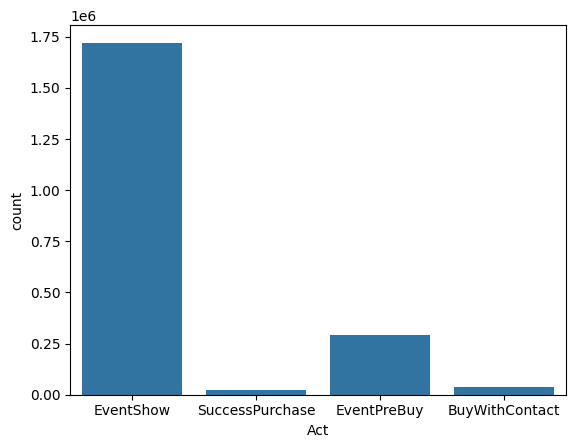

In [ ]:
sns.countplot(data=df, x='Act');

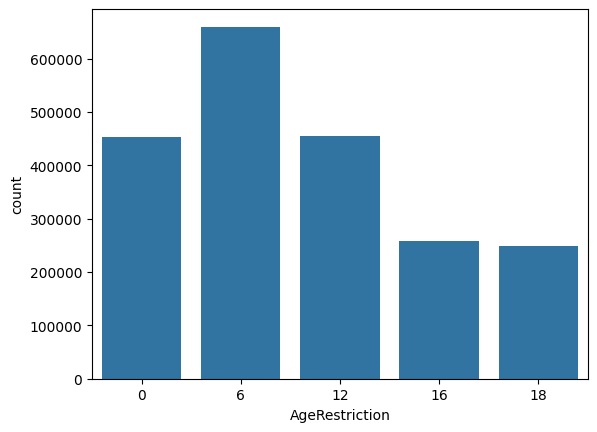

In [ ]:
sns.countplot(data=df, x='AgeRestriction');

### Считаем количетсво пользователей и событий

Количество пользователей

In [ ]:
df['UserID'].nunique()

430083

Количество событий

In [ ]:
df['EventID'].nunique()

11251

## Преобазовываем данные

### Преобразуем категории в ohe

In [ ]:
df['Categories'] = df['Categories'].apply(lambda x: x.split(';'))

In [ ]:
df = df.join(df['Categories'].str.join('|').str.get_dummies())

In [ ]:
df.columns

Index(['DeviceType', 'UserID', 'Act', 'EventID', 'Type', 'AgeRestriction',
       'Categories', 'SUP прогулки', 'Аттракцион', 'Балет', 'Баскетбол', 'Бег',
       'Бесплатно', 'Билеты в Мариинский театр', 'Билеты в Театр кукол',
       'Билеты в Филармонию', 'Билеты в театр Молодежи',
       'Билеты в театр им. Горького', 'Вебинары', 'Вечеринки',
       'Викторины и квизы', 'Впечатления', 'Встреча', 'Выставка', 'Гастроли',
       'Гонка', 'Городское событие', 'Дегустация', 'Детские экскурсии',
       'Детский лагерь', 'Детский мастер-класс', 'Детям', 'Джаз', 'Дискотека',
       'Живая музыка', 'Зимние развлечения', 'Йога', 'Каникулы',
       'Квесты и игры', 'Кинопоказ', 'Классическая музыка', 'Концерты',
       'Кулинарный мастер-класс', 'Курсы', 'Лекция', 'Масленица',
       'Мастер-классы', 'Мафия', 'Музеи и галереи', 'Новогодние концерты',
       'Новогодние туры', 'Новый год', 'Обучение', 'Онлайн', 'Опера',
       'Остров Шкота', 'По городу', 'Познавательная программа', 'Поп-музыка

In [ ]:
df.head()

,DeviceType,UserID,Act,EventID,Type,AgeRestriction,Categories,SUP прогулки,Аттракцион,Балет,...,Хобби,Хоккей,Цирк,Шансон,Шоу,Экологические акции,Экскурсии и туры,Экскурсия,Эстрадный концерт,Ярмарка
0,mobile,6eaafef9d6c89ac6f9d894273710e623,EventShow,93617e256881c731fef1e44d75efd4a7,PAID,12,"[Впечатления, Встреча, Рисование]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mobile,8605e22b0a4ac09565853b94dca2ac2b,EventShow,263d7f23720cb4c3e49e8f72d4da05a4,PAID,6,"[Впечатления, Детям, Концерты, Рок-музыка, Спе...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mobile,b725686bedb1a872bea9ab24f686f7ce,EventShow,1727bc129a45f77c44734f22a4d9ac2a,PAID,12,[Впечатления],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,desktop,643c3a53efa6780bb7ff7989c4d75f02,EventShow,406d4c53608352ab96fe9757fcaeede5,PAID,12,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,desktop,9b933ab3010b5e8870cb7ebb36d8d9ae,SuccessPurchase,0f0e98b8568dd945a9b6cf83e36faf0c,PAID,16,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Преобразуем UserID и EventID в числовые индексы

In [ ]:
df['UserID'], user_id_index = pd.factorize(df['UserID'])
df['EventID'], event_id_index = pd.factorize(df['EventID'])

### Преобразуем DeviceType в 0 если мобильный телефон и 1 в противном случае

In [ ]:
df['DeviceType'] = df['DeviceType'].apply(lambda x: 0 if x == 'mobile' else 1)

### Преобразуем Type в 1 если платный иначе 0

In [ ]:
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'PAID' else 0)

In [ ]:
df.head()

,DeviceType,UserID,Act,EventID,Type,AgeRestriction,Categories,SUP прогулки,Аттракцион,Балет,...,Хобби,Хоккей,Цирк,Шансон,Шоу,Экологические акции,Экскурсии и туры,Экскурсия,Эстрадный концерт,Ярмарка
0,0,0,EventShow,0,1,12,"[Впечатления, Встреча, Рисование]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,EventShow,1,1,6,"[Впечатления, Детям, Концерты, Рок-музыка, Спе...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,EventShow,2,1,12,[Впечатления],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,EventShow,3,1,12,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,SuccessPurchase,4,1,16,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Преобразуем Act

In [ ]:
act_mapping = {
    'EventShow': 1,
    'EventPreBuy': 2,
    'BuyWithContact': 3,
    'SuccessPurchase': 4
}

In [ ]:
df['Act'] = df['Act'].map(act_mapping)

In [ ]:
df.head()

,DeviceType,UserID,Act,EventID,Type,AgeRestriction,Categories,SUP прогулки,Аттракцион,Балет,...,Хобби,Хоккей,Цирк,Шансон,Шоу,Экологические акции,Экскурсии и туры,Экскурсия,Эстрадный концерт,Ярмарка
0,0,0,1,0,1,12,"[Впечатления, Встреча, Рисование]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,6,"[Впечатления, Детям, Концерты, Рок-музыка, Спе...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,2,1,12,[Впечатления],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,1,3,1,12,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,4,4,1,16,"[Гастроли, Спектакль, Театры]",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(columns=['Categories'])

## Загружаем датасет на диск

In [ ]:
df.to_csv('/content/drive/MyDrive/prepared_data.csv', sep=';', encoding='utf-8')